In [32]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


pip install pandas
    ```
*   **Google Cloud SDK or Authentication:** You need a way to authenticate with Google Cloud so your Python script can access BigQuery. The most common ways are:
    *   **Google Cloud SDK:** If you have the Google Cloud SDK installed and configured (`gcloud init`), Pandas will often pick up your credentials automatically.
    *   **Service Account Key:** You can create a service account in Google Cloud, download its JSON key file, and point to it in your code.

**Step-by-Step Instructions:**

1.  **Import Necessary Libraries:**
    You'll need `pandas` for data manipulation and `google.cloud.bigquery` to interact with BigQuery.

    ```python
    import pandas as pd
    from google.cloud import bigquery
    ```

2.  **Initialize a BigQuery Client:**
    This client will be used to execute your SQL query against BigQuery.

    ```python
    # If you have the Google Cloud SDK configured, this should work.
    # Otherwise, you might need to specify your project ID explicitly
    # or set the GOOGLE_APPLICATION_CREDENTIALS environment variable
    # to the path of your service account key file.
    client = bigquery.Client()
    ```

    *   **If you're using a service account key:**
        ```python
        # Replace 'path/to/your/service_account_key.json' with the actual path
        client = bigquery.Client.from_service_account_json('path/to/your/service_account_key.json')
        ```
    *   **If you need to specify the project ID:**
        ```python
        # Replace 'your-gcp-project-id' with your actual Google Cloud Project ID
        client = bigquery.Client(project='your-gcp-project-id')
        ```

3.  **Define Your SQL Query:**
    Store your corrected GoogleSQL query in a Python string variable.

    ```python
    sql_query = """
    SELECT
      -- From order_items
      i.order_id,
      i.order_item_id,
      i.product_id,
      i.seller_id,
      i.shipping_limit_date,
      i.price,
      i.freight_value,

      -- From order_payments
      p.payment_sequential,
      p.payment_type,
      p.payment_installments,
      p.payment_value,

      -- From order_customers
      c.customer_id,
      c.customer_unique_id,
      c.customer_zip_code_prefix,
      c.customer_city,
      c.customer_state
    FROM `baby-names-app-db-511f7`.`brazil`.`olist_order_items` AS i
    LEFT JOIN `baby-names-app-db-511f7`.`brazil`.`olist_order_payments` AS p
      ON i.order_id = p.order_id
    LEFT JOIN `baby-names-app-db-511f7`.`brazil`.`olist_orders` AS o
      ON i.order_id = o.order_id
    LEFT JOIN `baby-names-app-db-511f7`.`brazil`.`olist_customers` AS c
      ON o.customer_id = c.customer_id
    """
    ```
    *   **Important:** Make sure the table names (`baby-names-app-db-511f7.brazil.olist_order_items`, etc.) are correct for your BigQuery project.

4.  **Execute the Query and Load into a Pandas DataFrame:**
    The `pd.read_gbq()` function is a convenient way to directly load query results from BigQuery into a DataFrame.


In [43]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns

import matplotlib.pyplot as plt

In [19]:
# Replace 'path/to/your/service_account_key.json' with the actual path
client = bigquery.Client.from_service_account_json('../baby-names-app-db-511f7-d5f1ffc138bc.json')

In [20]:
sql_query = """
    SELECT
      -- From order_items
      i.order_id,
      i.order_item_id,
      i.product_id,
      i.seller_id,
      i.shipping_limit_date,
      i.price,
      i.freight_value,

      -- From order_payments
      p.payment_sequential,
      p.payment_type,
      p.payment_installments,
      p.payment_value,

      -- From order_customers
      c.customer_id,
      c.customer_unique_id,
      c.customer_zip_code_prefix,
      c.customer_city,
      c.customer_state
    FROM `baby-names-app-db-511f7`.`brazil`.`olist_order_items` AS i
    LEFT JOIN `baby-names-app-db-511f7`.`brazil`.`olist_order_payments` AS p
      ON i.order_id = p.order_id
    LEFT JOIN `baby-names-app-db-511f7`.`brazil`.`olist_orders` AS o
      ON i.order_id = o.order_id
    LEFT JOIN `baby-names-app-db-511f7`.`brazil`.`olist_customers` AS c
      ON o.customer_id = c.customer_id
    """

In [34]:
df = pd.read_gbq(sql_query, project_id='baby-names-app-db-511f7', dialect='standard')

# To verify if data was loaded, you can print the first few rows
print(df.head())

                           order_id  order_item_id  \
0  3ee6513ae7ea23bdfab5b9ab60bffcb5              1   
1  6e864b3f0ec71031117ad4cf46b7f2a1              1   
2  c5bdd8ef3c0ec420232e668302179113              2   
3  8272b63d03f5f79c56e9e4120aec44ef              2   
4  8272b63d03f5f79c56e9e4120aec44ef              3   

                         product_id                         seller_id  \
0  8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
1  8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
2  8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
3  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
4  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   

        shipping_limit_date  price  freight_value  payment_sequential  \
0 2018-05-04 03:55:26+00:00   0.85          18.23                   1   
1 2018-05-02 20:30:34+00:00   0.85          18.23                   1   
2 2018-05-07 02:5

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   order_id                  117604 non-null  object             
 1   order_item_id             117604 non-null  Int64              
 2   product_id                117604 non-null  object             
 3   seller_id                 117604 non-null  object             
 4   shipping_limit_date       117604 non-null  datetime64[us, UTC]
 5   price                     117604 non-null  float64            
 6   freight_value             117604 non-null  float64            
 7   payment_sequential        117601 non-null  Int64              
 8   payment_type              117601 non-null  object             
 9   payment_installments      117601 non-null  Int64              
 10  payment_value             117601 non-null  float64            
 11  

In [36]:
print(df.isna().sum())

order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
payment_sequential          3
payment_type                3
payment_installments        3
payment_value               3
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [37]:
print(df[df.isna().any(axis=1)])

                               order_id  order_item_id  \
33183  bfbd0f9bdef84302105ad712db648a6c              1   
33184  bfbd0f9bdef84302105ad712db648a6c              2   
33185  bfbd0f9bdef84302105ad712db648a6c              3   

                             product_id                         seller_id  \
33183  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   
33184  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   
33185  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   

            shipping_limit_date  price  freight_value  payment_sequential  \
33183 2016-09-19 23:11:33+00:00  44.99           2.83                <NA>   
33184 2016-09-19 23:11:33+00:00  44.99           2.83                <NA>   
33185 2016-09-19 23:11:33+00:00  44.99           2.83                <NA>   

      payment_type  payment_installments  payment_value  \
33183         None                  <NA>            NaN   
33184         None             

In [38]:
df_numerical = df.select_dtypes(include=['number']).copy()
print(df_numerical.head())

   order_item_id  price  freight_value  payment_sequential  \
0              1   0.85          18.23                   1   
1              1   0.85          18.23                   1   
2              2   0.85          22.30                   1   
3              2   1.20           7.89                   1   
4              3   1.20           7.89                   1   

   payment_installments  payment_value  customer_zip_code_prefix  
0                     1          19.08                     13189  
1                     1          19.08                     25215  
2                     1          54.20                      6712  
3                     2         196.11                      5882  
4                     2         196.11                      5882  


In [39]:
df_no_na = df.dropna()
df_numerical_no_na = df_numerical.dropna()

In [40]:
print(df_numerical_no_na[df_numerical_no_na.isna().any(axis=1)])

Empty DataFrame
Columns: [order_item_id, price, freight_value, payment_sequential, payment_installments, payment_value, customer_zip_code_prefix]
Index: []


In [41]:
# Calculate the correlation matrix
correlation_matrix = df_numerical_no_na.corr()
print(correlation_matrix)

                          order_item_id     price  freight_value  \
order_item_id                  1.000000 -0.060488      -0.030568   
price                         -0.060488  1.000000       0.415809   
freight_value                 -0.030568  0.415809       1.000000   
payment_sequential            -0.002393  0.006989       0.023210   
payment_installments           0.073499  0.278645       0.186020   
payment_value                  0.264328  0.739501       0.373891   
customer_zip_code_prefix       0.000157  0.043318       0.225454   

                          payment_sequential  payment_installments  \
order_item_id                      -0.002393              0.073499   
price                               0.006989              0.278645   
freight_value                       0.023210              0.186020   
payment_sequential                  1.000000             -0.085736   
payment_installments               -0.085736              1.000000   
payment_value                      

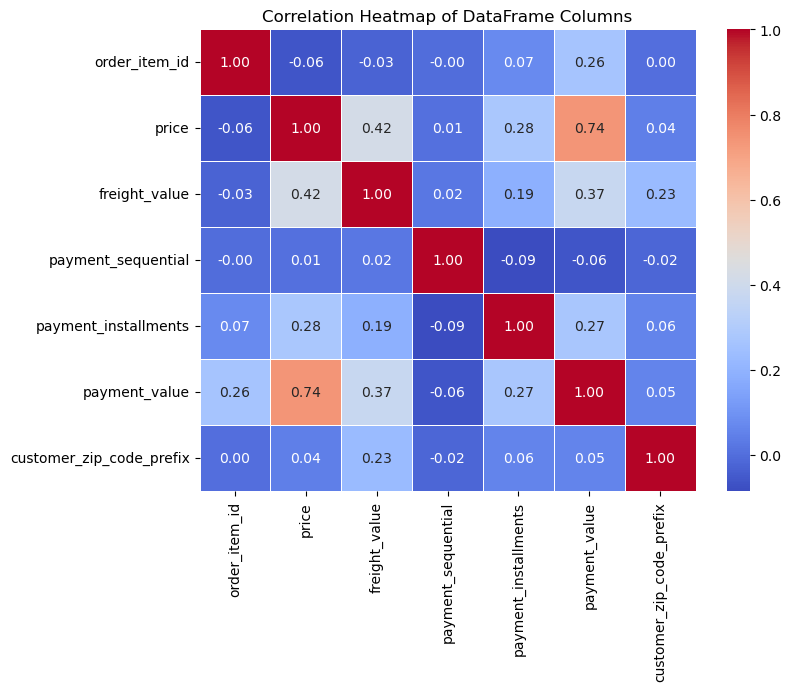

In [44]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

In [52]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26+00:00,0.85,18.23,1,boleto,1,19.08,161b6d415e8b3413c6609c70cf405b5a,d80730c15c647bc8f2ad77c908ba5ca9,13189,hortolandia,SP
1,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34+00:00,0.85,18.23,1,credit_card,1,19.08,9f9d249355f63c5c1216a82b802452c1,b38211bd797f4fdd81a98b9d1754b606,25215,duque de caxias,RJ
2,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22+00:00,0.85,22.30,1,boleto,1,54.20,5af78bf1a82a2660d1e3fd78c645f58f,f006d7920bd71c252f61ec355eb50dcb,6712,cotia,SP
3,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
4,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
5,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
6,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
7,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
8,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
9,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23+00:00,1.20,7.89,1,credit_card,2,196.11,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP


In [54]:
!pip install scikit-learn xgboost

  Using cached xgboost-3.1.2-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 9.2 MB/s eta 0:00:00a 0:00:01
Using cached xgboost-3.1.2-py3-none-macosx_12_0_arm64.whl (2.2 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [55]:
# ==============================================================================
# 1. IMPORTS AND SETUP
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Assumes df_no_na is already loaded and cleaned from previous steps in your notebook
# If not, use the following:
# df_no_na = df.dropna().copy()

# Define Target and Features
TARGET = 'freight_value'
NUMERICAL_FEATURES = ['price', 'payment_value', 'customer_zip_code_prefix']
CATEGORICAL_FEATURES = ['customer_state']

# Create the Feature Matrix (X) and Target Vector (y)
X = df_no_na[NUMERICAL_FEATURES + CATEGORICAL_FEATURES]
y = df_no_na[TARGET]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 94080
Testing samples: 23521


In [56]:
# ==============================================================================
# 2. PREPROCESSING PIPELINE
# ==============================================================================

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer to apply different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ],
    remainder='drop'  # Drop any columns not specified
)

In [57]:
# ==============================================================================
# 3. PERFORMANCE EVALUATION FUNCTION
# ==============================================================================
def evaluate_model(model_name, y_true, y_pred):
    """Calculates and prints key regression performance metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 40)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [58]:
# ==============================================================================
# 4. MODEL 1: LINEAR REGRESSION (BASELINE)
# ==============================================================================
print("Starting Linear Regression (Baseline) Training...")

# Create the full pipeline for Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
lr_metrics = evaluate_model("Linear Regression (Baseline)", y_test, y_pred_lr)

Starting Linear Regression (Baseline) Training...
--- Linear Regression (Baseline) Performance ---
Root Mean Squared Error (RMSE): 13.16
Mean Absolute Error (MAE): 6.69
R-squared (R2): 0.2824
----------------------------------------


In [59]:
# ==============================================================================
# 5. MODEL 2: GRADIENT BOOSTING REGRESSOR (XGBoost)
# ==============================================================================
print("Starting XGBoost Regressor Training...")

# Use default XGBoost parameters for a quick test
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,  # Number of boosting rounds
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1, # Use all available cores
    tree_method='hist' # Faster tree construction
)

# Create the full pipeline for XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_regressor)
])

# Train the model
# Note: XGBoost is generally robust to scaling, but we keep the scaler in the pipeline
# for a consistent comparison with Linear Regression.
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
xgb_metrics = evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)

Starting XGBoost Regressor Training...
--- XGBoost Regressor Performance ---
Root Mean Squared Error (RMSE): 9.76
Mean Absolute Error (MAE): 4.02
R-squared (R2): 0.6052
----------------------------------------
